# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/train_FD001.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


The last two columns return a NaN value due to the text file having 2 end spaces, for further pre-processing, we drop them...

In [3]:
#df.drop(df.iloc[:, 26], axis = 1)
#df.drop(df.iloc[:, 27], axis = 1)
#df
df = df.drop(df.columns[27], axis=1)
df = df.drop(df.columns[26], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


The data consists of the following columns:


*   Engine Unit Number
*   Time (In Cycles)
*   Operating Settings 1
*   Operating Settings 2
*   Operating Settings 3
*   Sensor Readings 1
*   ...
*   ...
*   ...
*   Sensor Readings 21

In [4]:
df.columns = df.columns.astype(str)
column_names = df.columns
print(column_names)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25'],
      dtype='object')


There are two kinds of features unique to time series: **time-step features** and **lag features**.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

With respect to this particular dataset, the Time_In_cycles is the time dummy variable equivalent.

In [5]:
# Renaming columns with new names
# df = df.rename(columns={'': 'Engine_Unit_Number', '': 'Time_In_Cycles', '': 'Operating_settings_1', '': 'Operating_settings_2', '': 'Operating_settings_3', '': 'Sensor_readings_1', '': 'Sensor_readings_2', '': 'Sensor_readings_3', '': 'Sensor_readings_4', '': 'Sensor_readings_5', '': 'Sensor_readings_6', '': 'Sensor_readings_7', '': 'Sensor_readings_8', '': 'Sensor_readings_9', '': 'Sensor_readings_10', '': 'Sensor_readings_11', '': 'Sensor_readings_12', '': 'Sensor_readings_13', '': 'Sensor_readings_14', '': 'Sensor_readings_15', '': 'Sensor_readings_16', '': 'Sensor_readings_17', '': 'Sensor_readings_18', '': 'Sensor_readings_19', '': 'Sensor_readings_20', '': 'Sensor_readings_21'})
df = df.rename(columns={'0': 'Engine_Unit_Number', '1': 'Time_In_Cycles', '2': 'Operating_settings_1', '3': 'Operating_settings_2', '4': 'Operating_settings_3', '5': 'Sensor_readings_1', '6': 'Sensor_readings_2', '7': 'Sensor_readings_3', '8': 'Sensor_readings_4', '9': 'Sensor_readings_5', '10': 'Sensor_readings_6', '11': 'Sensor_readings_7', '12': 'Sensor_readings_8', '13': 'Sensor_readings_9', '14': 'Sensor_readings_10', '15': 'Sensor_readings_11', '16': 'Sensor_readings_12', '17': 'Sensor_readings_13', '18': 'Sensor_readings_14', '19': 'Sensor_readings_15', '20': 'Sensor_readings_16', '21': 'Sensor_readings_17', '22': 'Sensor_readings_18', '23': 'Sensor_readings_19', '24': 'Sensor_readings_20', '25': 'Sensor_readings_21'})
df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
df.describe()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


For terms with 0 Standard Deviation, there is no correlation. In loose conceptual terms, a correlation is telling you about how one variable moves around as the other variable moves around. An SD of 0 implies that variable is not 'moving around'. As such we may drop Sensor Readings having a Standard Deviation of 0, and create a new dataframe, allowing us to play around with and experiment on both variations of the dataframe...

In [7]:
df.std()

Engine_Unit_Number      2.922763e+01
Time_In_Cycles          6.888099e+01
Operating_settings_1    2.187313e-03
Operating_settings_2    2.930621e-04
Operating_settings_3    0.000000e+00
Sensor_readings_1       0.000000e+00
Sensor_readings_2       5.000533e-01
Sensor_readings_3       6.131150e+00
Sensor_readings_4       9.000605e+00
Sensor_readings_5       1.776400e-15
Sensor_readings_6       1.388985e-03
Sensor_readings_7       8.850923e-01
Sensor_readings_8       7.098548e-02
Sensor_readings_9       2.208288e+01
Sensor_readings_10      0.000000e+00
Sensor_readings_11      2.670874e-01
Sensor_readings_12      7.375534e-01
Sensor_readings_13      7.191892e-02
Sensor_readings_14      1.907618e+01
Sensor_readings_15      3.750504e-02
Sensor_readings_16      1.387812e-17
Sensor_readings_17      1.548763e+00
Sensor_readings_18      0.000000e+00
Sensor_readings_19      0.000000e+00
Sensor_readings_20      1.807464e-01
Sensor_readings_21      1.082509e-01
dtype: float64

In [8]:
df_xstd = df

#df_xstd = df_xstd.drop(df_xstd.columns[23], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[22], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[14], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[5], axis=1)

#df_xstd

# Dropping columns
drop_columns = ['Sensor_readings_18', 'Sensor_readings_19', 'Sensor_readings_10', 'Sensor_readings_1']
df_xstd = df_xstd.drop(drop_columns, axis = 1)
df_xstd

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,14.62,21.61,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,14.62,21.61,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,14.62,21.61,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,14.62,21.61,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,14.62,21.61,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,643.49,1597.98,1428.63,14.62,21.61,...,9065.52,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,643.54,1604.50,1433.58,14.62,21.61,...,9065.11,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,643.42,1602.46,1428.18,14.62,21.61,...,9065.90,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,643.23,1605.26,1426.53,14.62,21.61,...,9073.72,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640


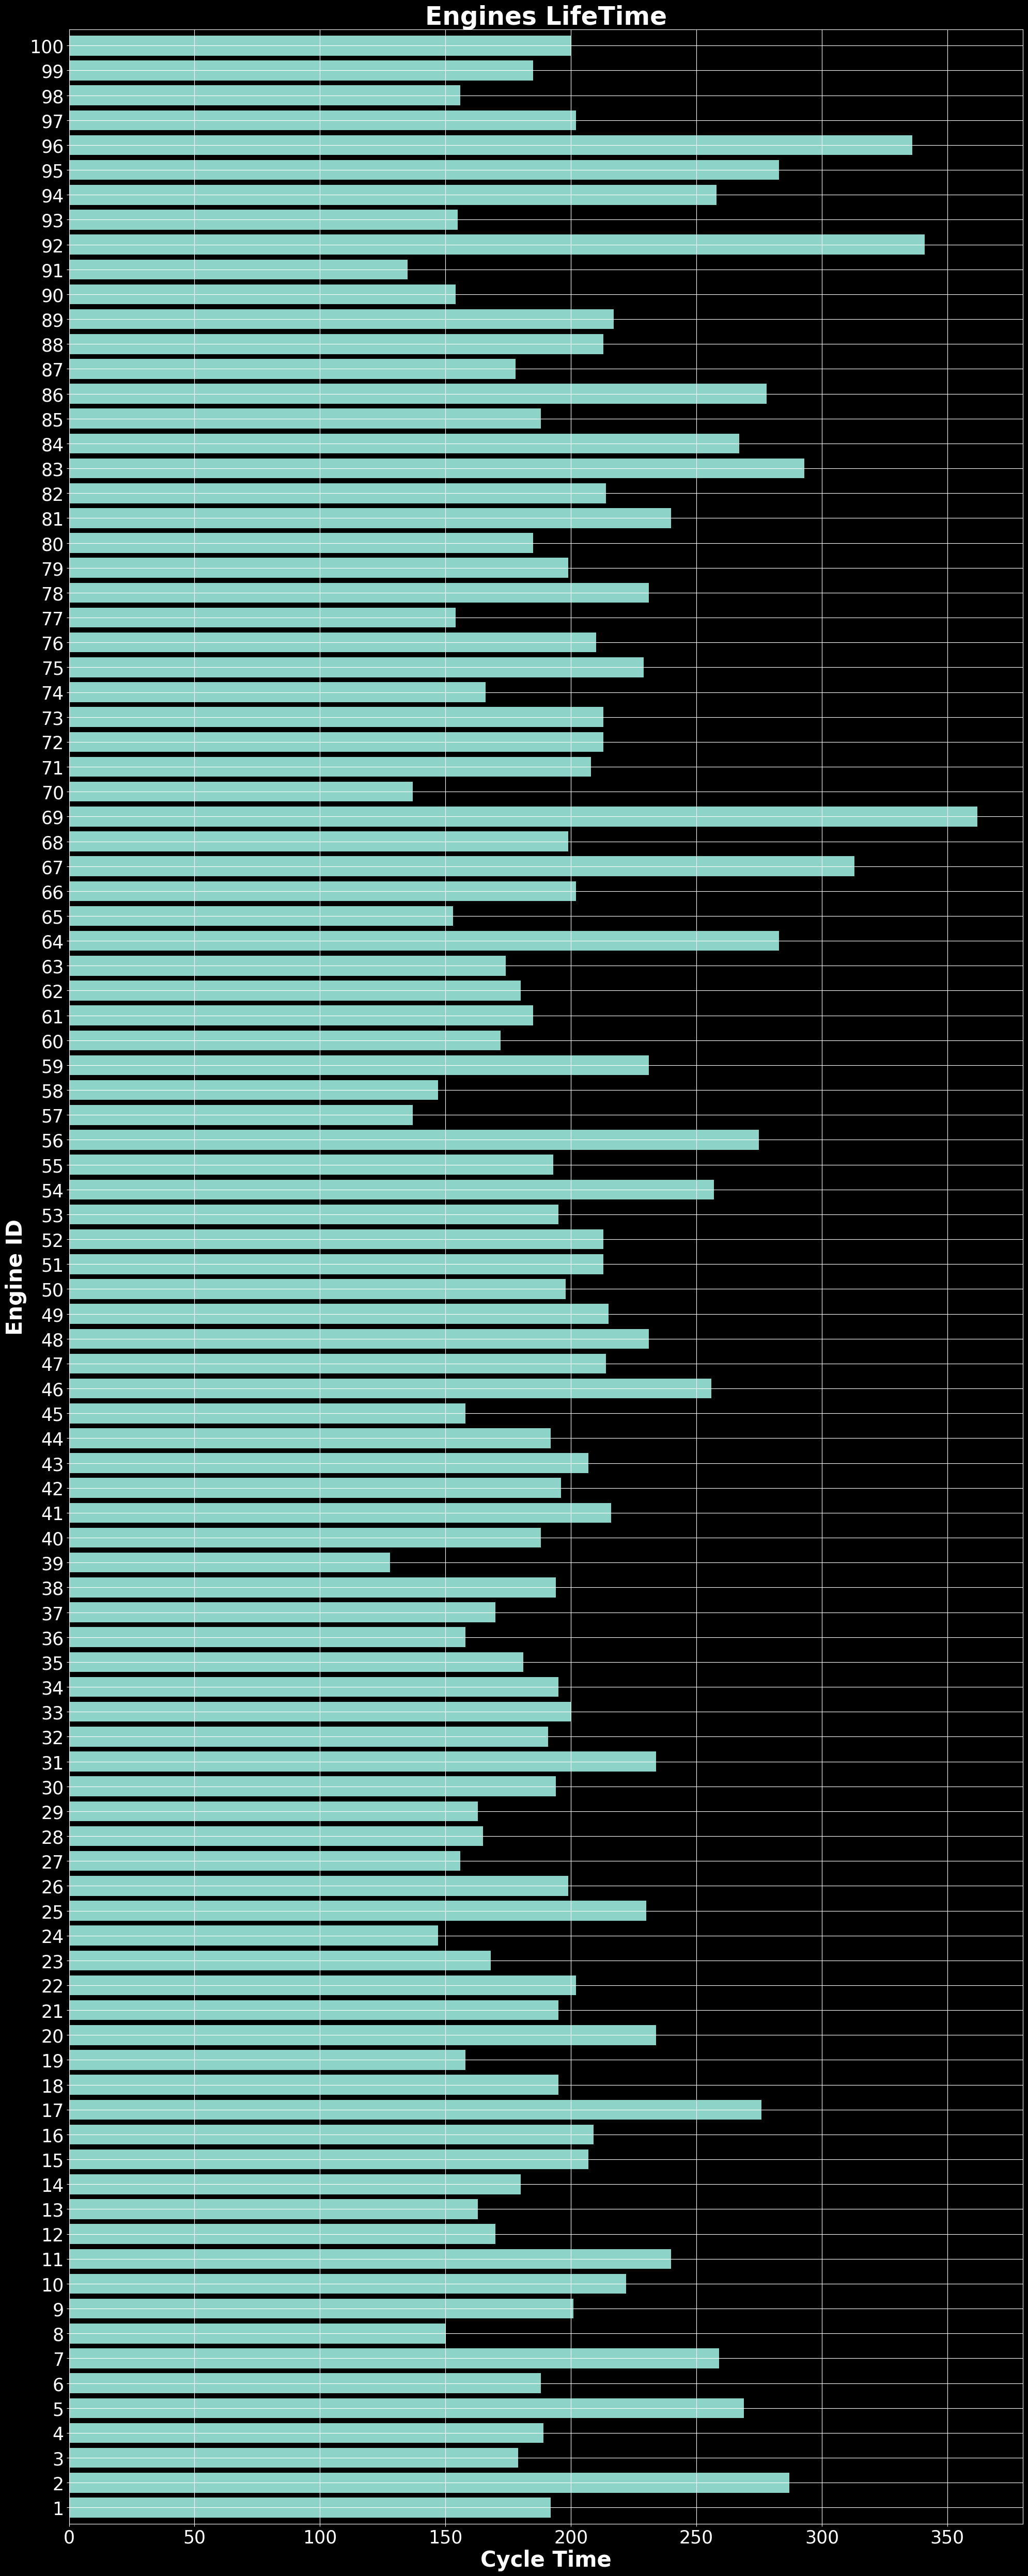

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax=df_xstd.groupby('Engine_Unit_Number')['Time_In_Cycles'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=35)
plt.xlabel('Cycle Time',fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Normalisation**

In [10]:
# Selecting columns for normalization
columns_to_normalize = ['Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_5',	'Sensor_readings_6',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_16',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']

# Extracting the columns to be normalized
columns_data = df_xstd[columns_to_normalize]

# Performing the Min-Max normalization on selected columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(columns_data)

# Updating the DataFrame with normalized values
df_xstd[columns_to_normalize] = normalized_data

df_xstd

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0007,-0.0004,100.0,0.183735,0.406802,0.309757,0.0,1.0,...,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.713178,0.724662
1,1,2,0.0019,-0.0003,100.0,0.283133,0.453019,0.352633,0.0,1.0,...,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.666667,0.731014
2,1,3,-0.0043,0.0003,100.0,0.343373,0.369523,0.370527,0.0,1.0,...,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.627907,0.621375
3,1,4,0.0007,0.0000,100.0,0.343373,0.256159,0.331195,0.0,1.0,...,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.573643,0.662386
4,1,5,-0.0019,-0.0002,100.0,0.349398,0.257467,0.404625,0.0,1.0,...,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,0.686747,0.587312,0.782917,0.0,1.0,...,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.271318,0.109500
20627,100,197,-0.0016,-0.0005,100.0,0.701807,0.729453,0.866475,0.0,1.0,...,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.124031,0.366197
20628,100,198,0.0004,0.0000,100.0,0.665663,0.684979,0.775321,0.0,1.0,...,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.232558,0.053991
20629,100,199,-0.0011,0.0003,100.0,0.608434,0.746021,0.747468,0.0,1.0,...,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.116279,0.234466


In [11]:
# Grouping the DataFrame by the 'Engine_Unit_Number' column
grouped = df.groupby('Engine_Unit_Number')

# Iterating over the groups and creating individual DataFrames
individual_dfxstd = []
for group_name, group_df in grouped:
    individual_dfxstd.append(group_df)

individual_dfxstd[1]


# Accessing individual DataFrames

# for i, individual_df in enumerate(individual_dfs):
#     print(f"DataFrame {i+1}:")
#     print(individual_df)
#     print('\n')

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100.0,518.67,643.78,1602.03,1429.67,14.62,...,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100.0,38.42,23.0358
475,2,284,-0.0006,0.0001,100.0,518.67,643.91,1601.35,1430.04,14.62,...,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100.0,38.23,23.1196
476,2,285,-0.0007,0.0004,100.0,518.67,643.67,1596.84,1431.17,14.62,...,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100.0,38.39,23.1155
477,2,286,-0.0010,-0.0003,100.0,518.67,643.44,1603.63,1429.57,14.62,...,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100.0,38.33,23.0169


<ipython-input-12-98657d1b6223>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


KeyError: ignored

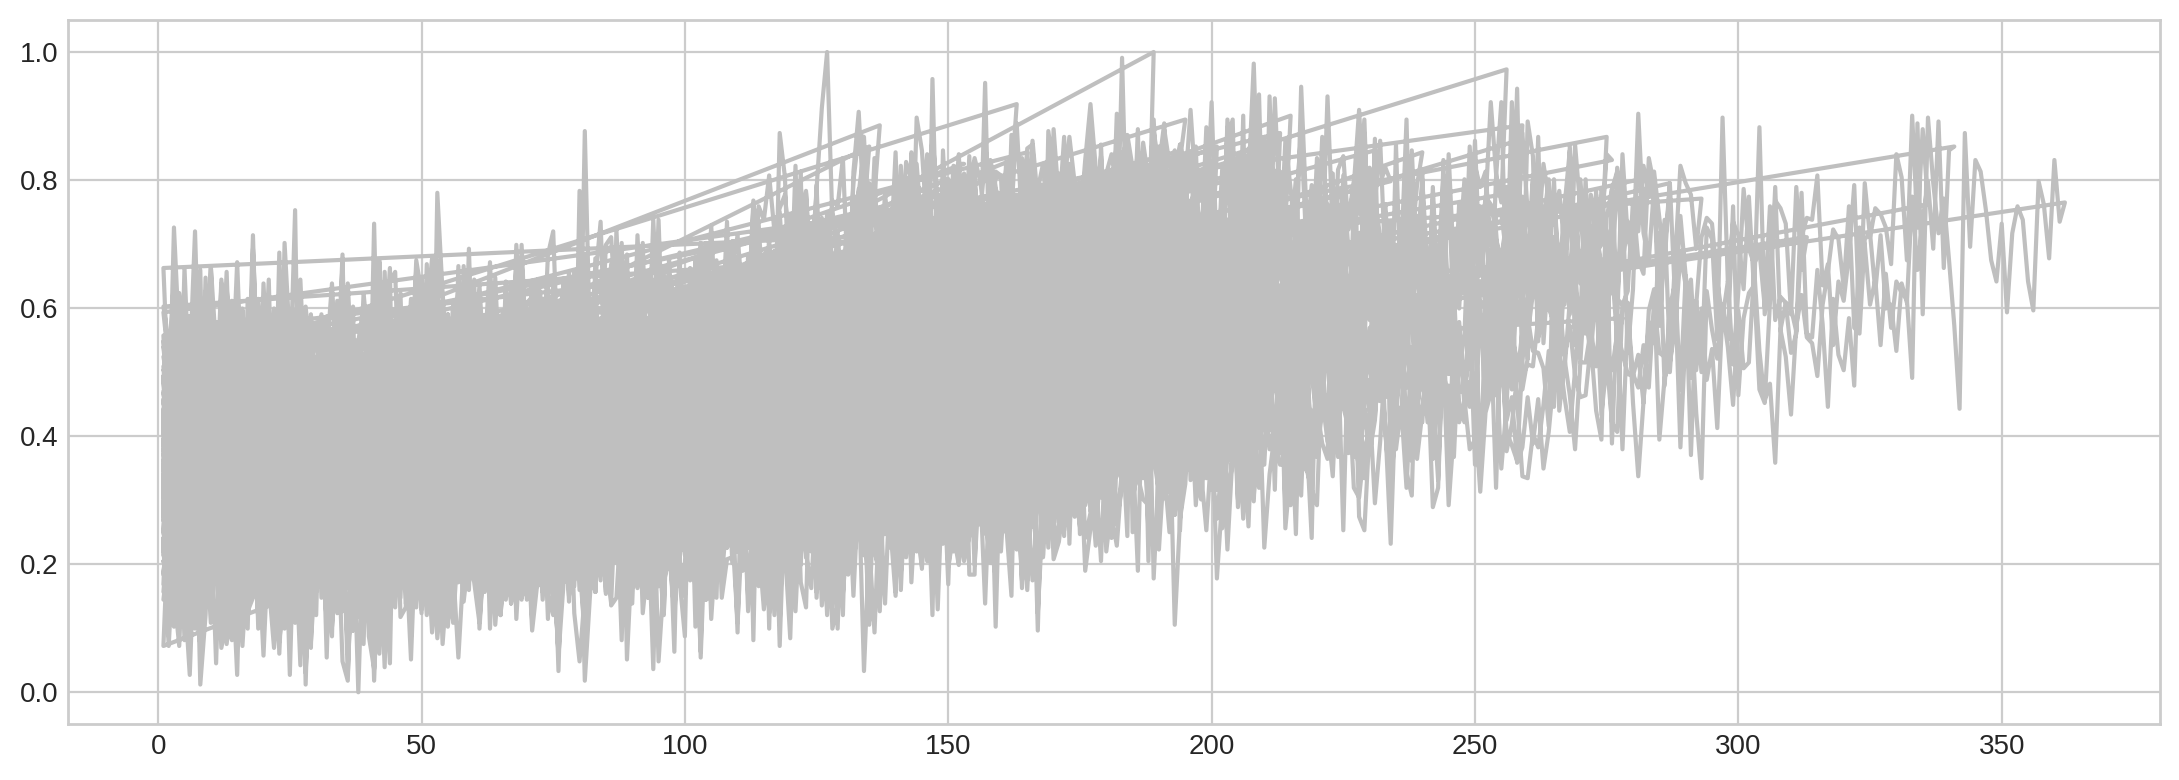

In [12]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time_In_Cycles', 'Sensor_readings_2', data=df_xstd, color='0.75')    #df_xstd.groupby('Engine_unit_Number')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');